In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import io

from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# loading data
file_path="Resources/FoodAccess2019CensusTractAll.csv"
foodAccess_df=pd.read_csv(file_path, index_col=False)
foodAccess_df.head()

,CensusTract,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,6001400100,Alameda County,1,2937,1314,0,0,0,0,0,...,2161.0,142.0,456.0,9.0,4.0,165.0,117.0,28.0,0.0,1.961698
1,6001400200,Alameda County,1,1974,856,0,0,0,0,0,...,1659.0,33.0,147.0,0.0,4.0,131.0,151.0,59.0,0.0,2.539102
2,6001400300,Alameda County,1,4865,2418,0,0,0,0,0,...,3468.0,518.0,423.0,5.0,17.0,434.0,399.0,423.0,38.0,1.516096
3,6001400400,Alameda County,1,3703,1779,0,0,0,0,0,...,2628.0,456.0,278.0,6.0,14.0,321.0,332.0,157.0,115.0,1.695938
4,6001400500,Alameda County,1,3517,1578,0,0,0,0,0,...,1905.0,955.0,209.0,5.0,27.0,416.0,340.0,188.0,51.0,0.778867


In [3]:
#Create DataFrame
foodAccess_2019=pd.DataFrame(foodAccess_df)

In [4]:
#copy DataFrame
new_foodAccess_df=foodAccess_2019.copy()
new_foodAccess_df.head()

,CensusTract,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,6001400100,Alameda County,1,2937,1314,0,0,0,0,0,...,2161.0,142.0,456.0,9.0,4.0,165.0,117.0,28.0,0.0,1.961698
1,6001400200,Alameda County,1,1974,856,0,0,0,0,0,...,1659.0,33.0,147.0,0.0,4.0,131.0,151.0,59.0,0.0,2.539102
2,6001400300,Alameda County,1,4865,2418,0,0,0,0,0,...,3468.0,518.0,423.0,5.0,17.0,434.0,399.0,423.0,38.0,1.516096
3,6001400400,Alameda County,1,3703,1779,0,0,0,0,0,...,2628.0,456.0,278.0,6.0,14.0,321.0,332.0,157.0,115.0,1.695938
4,6001400500,Alameda County,1,3517,1578,0,0,0,0,0,...,1905.0,955.0,209.0,5.0,27.0,416.0,340.0,188.0,51.0,0.778867


In [5]:
len(new_foodAccess_df)

7689

In [6]:
new_foodAccess_df.columns

Index(['CensusTract', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20',
       'LATractsVehicle_20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],
      dtype='object')

<IPython.core.display.Javascript object>


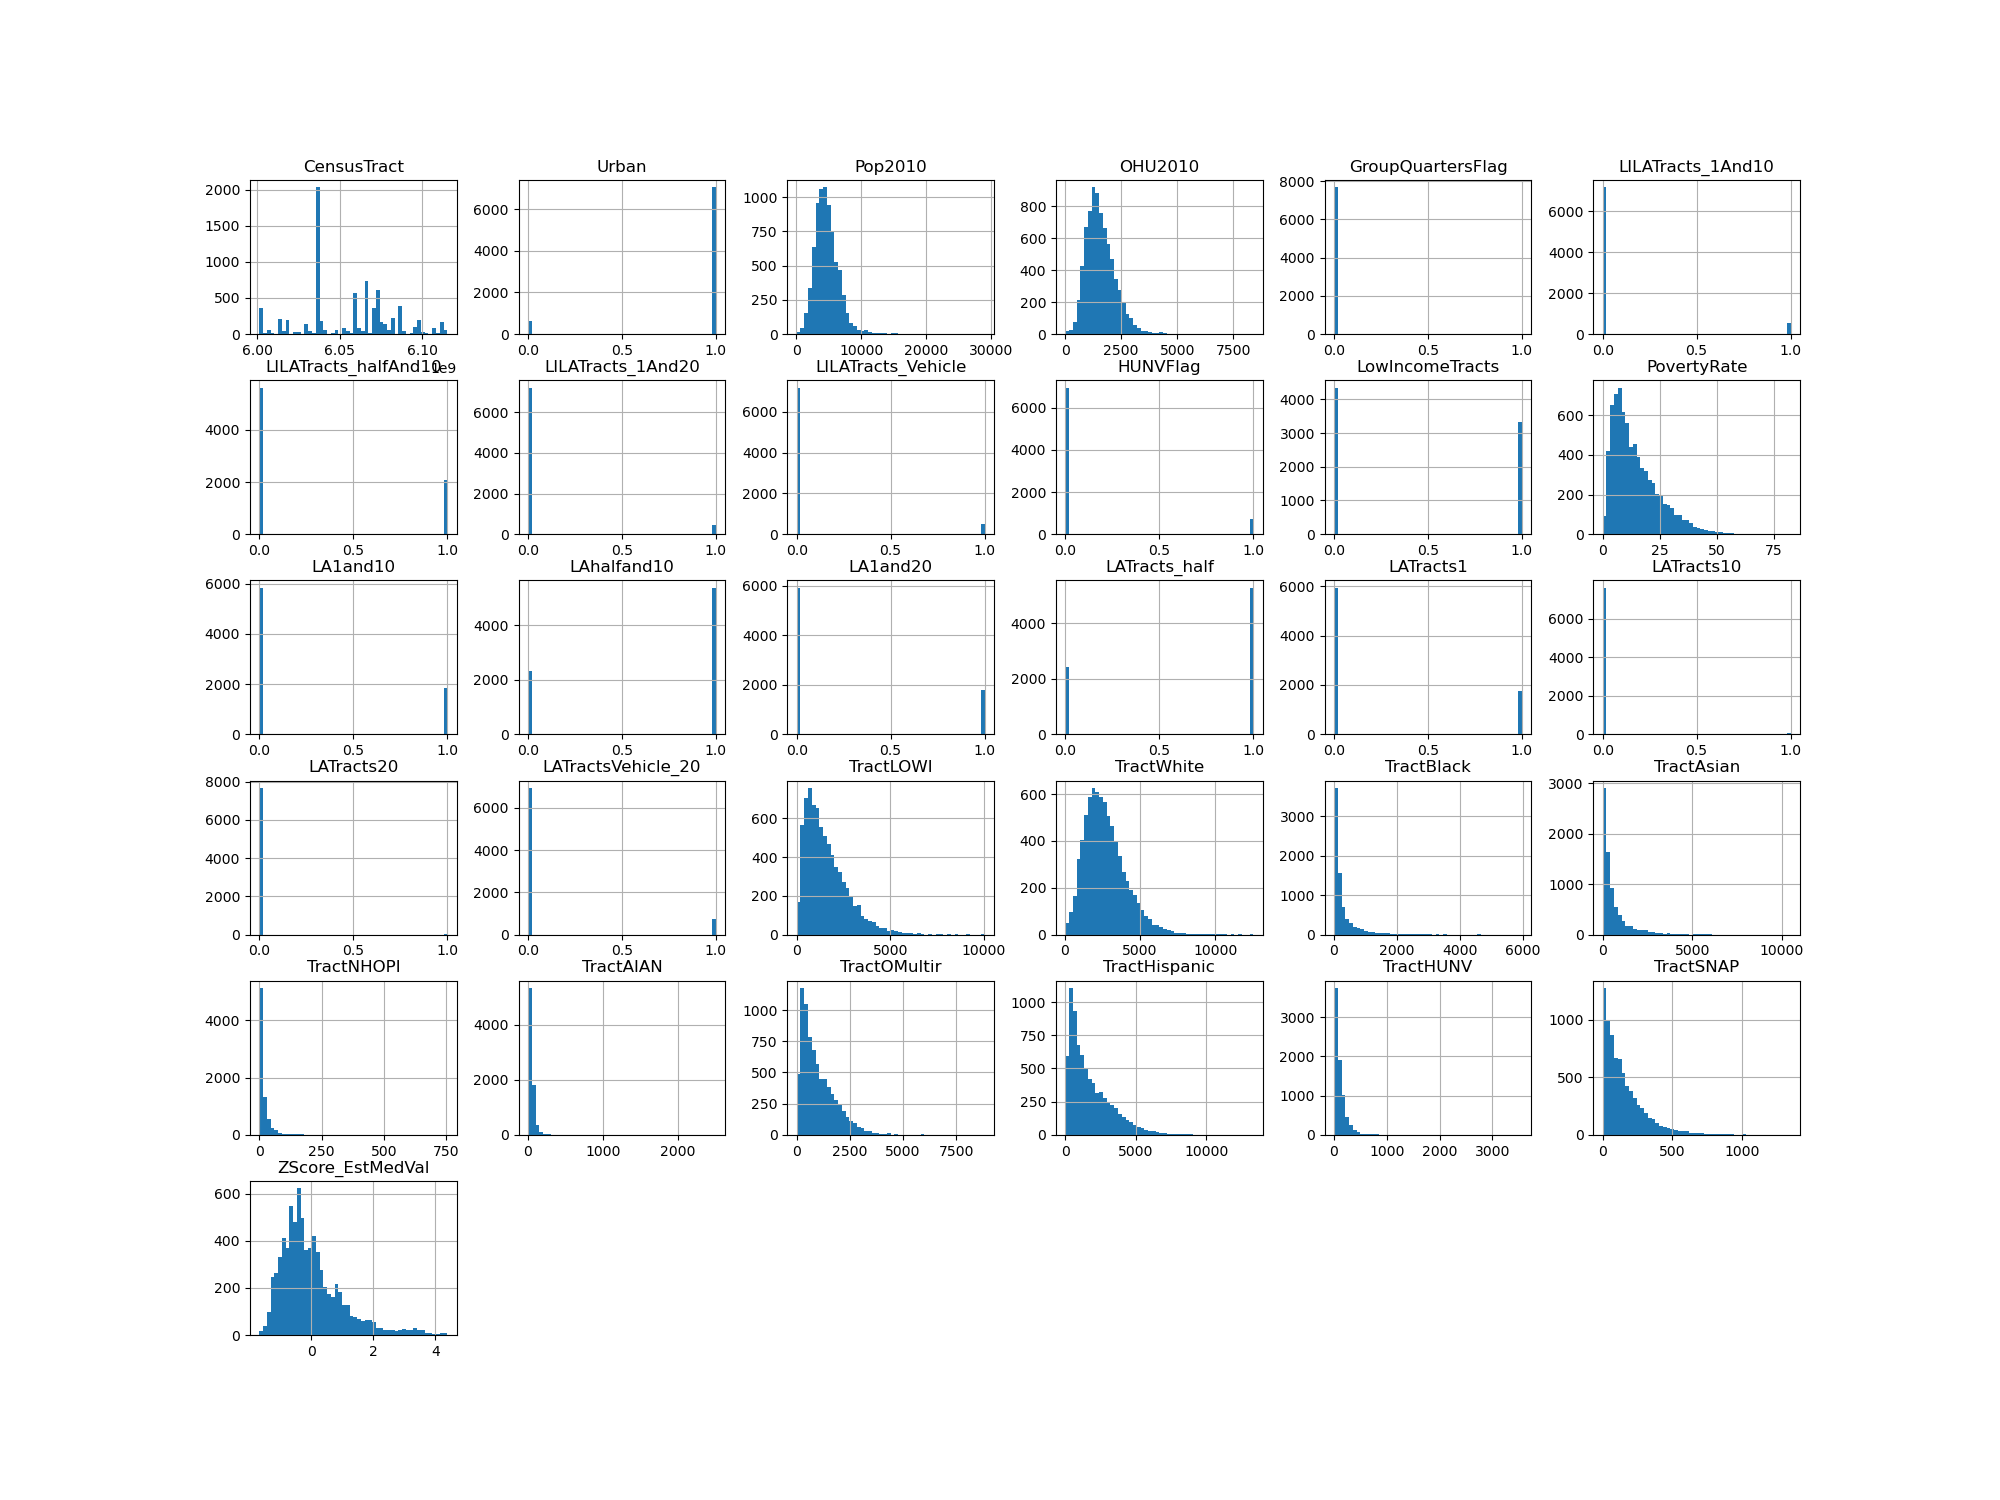

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
new_foodAccess_df.hist(bins=50, figsize=(20,15))
plt.show()


In [8]:
## method1 Simple Statistical linear regression model
import statsmodels.formula.api as sm

In [9]:
# Fitting the OLS on data
model = sm.ols('ZScore_EstMedVal ~ Urban+Pop2010+OHU2010+GroupQuartersFlag+LILATracts_1And10+LILATracts_halfAnd10+LILATracts_1And20+LILATracts_Vehicle+HUNVFlag+LowIncomeTracts+PovertyRate+LA1and10+LAhalfand10+LA1and20+LATracts_half+LATracts1+LATracts10+LATracts20+LATractsVehicle_20+TractLOWI+TractWhite+TractBlack+TractAsian+TractNHOPI+TractAIAN+TractOMultir+TractHispanic+TractHUNV+TractSNAP',new_foodAccess_df).fit()
print(model.params)

Intercept               0.207523
Urban                   0.481517
Pop2010                -0.000408
OHU2010                 0.000150
GroupQuartersFlag       0.184768
LILATracts_1And10       0.190142
LILATracts_halfAnd10    0.128879
LILATracts_1And20      -0.305863
LILATracts_Vehicle      0.239416
HUNVFlag               -0.103208
LowIncomeTracts        -0.358461
PovertyRate            -0.011307
LA1and10               -0.041033
LAhalfand10            -0.212618
LA1and20               -0.131228
LATracts_half          -0.073944
LATracts1               0.097641
LATracts10             -0.138674
LATracts20             -0.228870
LATractsVehicle_20     -0.038828
TractLOWI              -0.000134
TractWhite              0.000417
TractBlack              0.000257
TractAsian              0.000564
TractNHOPI             -0.001098
TractAIAN              -0.001277
TractOMultir            0.000729
TractHispanic          -0.000193
TractHUNV               0.000871
TractSNAP              -0.001472
dtype: flo

In [10]:
print(model.summary2())

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.433     
Dependent Variable:   ZScore_EstMedVal AIC:                17487.3115
Date:                 2022-06-01 20:54 BIC:                17667.9477
No. Observations:     7689             Log-Likelihood:     -8717.7   
Df Model:             25               F-statistic:        235.7     
Df Residuals:         7663             Prob (F-statistic): 0.00      
R-squared:            0.435            Scale:              0.56727   
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             0.2075   0.0455   4.5583 0.0000  0.1183  0.2968
Urban                 0.4815   0.0414  11.6360 0.0000  0.4004  0.5626
Pop2010              -0.0004   0.0000  -8.5106 0.0000 -0.0005 -0.0003
OHU2010               0.0001   0.0000  

In [11]:
#stewise regression for chosing related variables & better way using regression model
x_columns=['Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20',
       'LATractsVehicle_20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP']

In [12]:
y=new_foodAccess_df["ZScore_EstMedVal"]
y

0       1.961698
1       2.539102
2       1.516096
3       1.695938
4       0.778867
          ...   
7684   -0.799678
7685   -0.885595
7686   -1.043265
7687   -0.648167
7688   -0.938254
Name: ZScore_EstMedVal, Length: 7689, dtype: float64

In [13]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = new_foodAccess_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              234.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8728.1
No. Observations:                7689   AIC:                                  1.751e+04
Df Residuals:                    7664   BIC:                                  1.768e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [14]:
# loop through model testing
x_columns.remove("GroupQuartersFlag")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              244.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8728.4
No. Observations:                7689   AIC:                                  1.750e+04
Df Residuals:                    7665   BIC:                                  1.767e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [15]:
x_columns.remove("LILATracts_1And10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              254.5
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8728.9
No. Observations:                7689   AIC:                                  1.750e+04
Df Residuals:                    7666   BIC:                                  1.766e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [16]:
x_columns.remove("HUNVFlag")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              266.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8728.9
No. Observations:                7689   AIC:                                  1.750e+04
Df Residuals:                    7667   BIC:                                  1.765e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [17]:
x_columns.remove("LA1and10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              266.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8728.9
No. Observations:                7689   AIC:                                  1.750e+04
Df Residuals:                    7667   BIC:                                  1.765e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [18]:
x_columns.remove("LATracts10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              266.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8728.9
No. Observations:                7689   AIC:                                  1.750e+04
Df Residuals:                    7667   BIC:                                  1.765e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [19]:
x_columns.remove("LATracts_half")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              278.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8729.4
No. Observations:                7689   AIC:                                  1.750e+04
Df Residuals:                    7668   BIC:                                  1.765e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [20]:
x_columns.remove("LATracts20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              278.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:59   Log-Likelihood:                         -8729.4
No. Observations:                7689   AIC:                                  1.750e+04
Df Residuals:                    7668   BIC:                                  1.765e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<IPython.core.display.Javascript object>


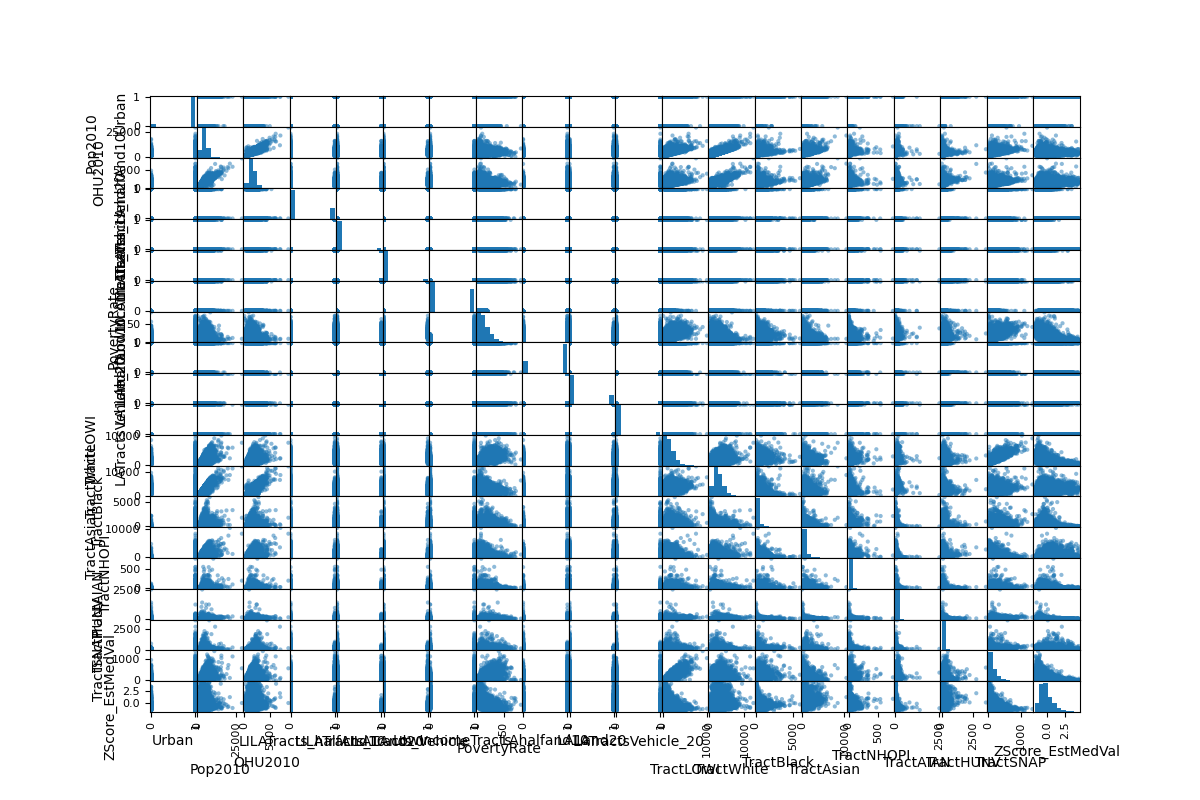

array([[<AxesSubplot:xlabel='Urban', ylabel='Urban'>,
        <AxesSubplot:xlabel='Pop2010', ylabel='Urban'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='Urban'>,
        <AxesSubplot:xlabel='LILATracts_halfAnd10', ylabel='Urban'>,
        <AxesSubplot:xlabel='LILATracts_1And20', ylabel='Urban'>,
        <AxesSubplot:xlabel='LILATracts_Vehicle', ylabel='Urban'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='Urban'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='Urban'>,
        <AxesSubplot:xlabel='LAhalfand10', ylabel='Urban'>,
        <AxesSubplot:xlabel='LA1and20', ylabel='Urban'>,
        <AxesSubplot:xlabel='LATractsVehicle_20', ylabel='Urban'>,
        <AxesSubplot:xlabel='TractLOWI', ylabel='Urban'>,
        <AxesSubplot:xlabel='TractWhite', ylabel='Urban'>,
        <AxesSubplot:xlabel='TractBlack', ylabel='Urban'>,
        <AxesSubplot:xlabel='TractAsian', ylabel='Urban'>,
        <AxesSubplot:xlabel='TractNHOPI', ylabel='Urban'>,
        <AxesSubplot:xlabel='T

In [31]:
from pandas.plotting import scatter_matrix
colist=new_foodAccess_df.filter(['Urban','Pop2010', 'OHU2010', 
       'LILATracts_halfAnd10', 'LILATracts_1And20','LILATracts_Vehicle', 'LowIncomeTracts', 'PovertyRate', 'LAhalfand10', 'LA1and20', 'LATracts1', 'LATractsVehicle_20', 
        'TractLOWI', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir'
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(new_foodAccess_df[attributes], figsize=(12, 8))

In [ ]:
colist2=clean_foodAccess_df.filter(['Urban','POP2010', 'OHU2010', 'LILATracts_halfAnd10', 'LILATracts_1And20','LILATracts_Vehicle','ZScore_EstMedVal'], axis=1)
attributes = list(colist2)

plt.show()

In [38]:
clean_FoodAccess2019=new_foodAccess_df.filter(['Urban', 'Pop2010', 'OHU2010',
         'LILATracts_halfAnd10','LILATracts_1And20', 'LILATracts_Vehicle', 
       'LowIncomeTracts', 'PovertyRate',  'LAhalfand10', 'LA1and20',
        'LATracts1', 'LATractsVehicle_20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],axis=1)
clean_FoodAccess2019

,Urban,Pop2010,OHU2010,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,LAhalfand10,LA1and20,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,1,2937,1314,0,0,0,0,3.6,1,1,...,2161.0,142.0,456.0,9.0,4.0,165.0,117.0,28.0,0.0,1.961698
1,1,1974,856,0,0,0,0,6.5,0,0,...,1659.0,33.0,147.0,0.0,4.0,131.0,151.0,59.0,0.0,2.539102
2,1,4865,2418,0,0,0,0,5.3,1,0,...,3468.0,518.0,423.0,5.0,17.0,434.0,399.0,423.0,38.0,1.516096
3,1,3703,1779,0,0,0,0,11.3,0,0,...,2628.0,456.0,278.0,6.0,14.0,321.0,332.0,157.0,115.0,1.695938
4,1,3517,1578,0,0,0,0,11.9,1,0,...,1905.0,955.0,209.0,5.0,27.0,416.0,340.0,188.0,51.0,0.778867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,0,10879,3320,0,0,0,0,8.3,0,0,...,7103.0,565.0,856.0,103.0,157.0,2095.0,2759.0,86.0,208.0,-0.799678
7685,0,4233,1492,0,0,0,0,10.3,0,0,...,3289.0,44.0,213.0,5.0,77.0,605.0,713.0,58.0,108.0,-0.885595
7686,0,2783,968,0,0,0,1,25.4,0,0,...,1997.0,31.0,297.0,2.0,75.0,381.0,476.0,20.0,199.0,-1.043265
7687,0,7357,2802,0,0,0,0,8.1,0,0,...,6179.0,57.0,181.0,9.0,156.0,775.0,916.0,43.0,188.0,-0.648167


In [39]:
clean_FoodAccess2019.columns

Index(['Urban', 'Pop2010', 'OHU2010', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'LowIncomeTracts',
       'PovertyRate', 'LAhalfand10', 'LA1and20', 'LATracts1',
       'LATractsVehicle_20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],
      dtype='object')

In [40]:
import os  
os.makedirs('Resources/', exist_ok=True)  
clean_FoodAccess2019.to_csv('Resources/FoodAccess2019HousingPrice_All.csv', index=False)  

In [41]:
filepath='Resources/FoodAccess2019HousingPrice_All.csv'
clean_foodAccess_df=pd.read_csv(filepath)
clean_foodAccess_df.head()

,Urban,Pop2010,OHU2010,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,LAhalfand10,LA1and20,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,1,2937,1314,0,0,0,0,3.6,1,1,...,2161.0,142.0,456.0,9.0,4.0,165.0,117.0,28.0,0.0,1.961698
1,1,1974,856,0,0,0,0,6.5,0,0,...,1659.0,33.0,147.0,0.0,4.0,131.0,151.0,59.0,0.0,2.539102
2,1,4865,2418,0,0,0,0,5.3,1,0,...,3468.0,518.0,423.0,5.0,17.0,434.0,399.0,423.0,38.0,1.516096
3,1,3703,1779,0,0,0,0,11.3,0,0,...,2628.0,456.0,278.0,6.0,14.0,321.0,332.0,157.0,115.0,1.695938
4,1,3517,1578,0,0,0,0,11.9,1,0,...,1905.0,955.0,209.0,5.0,27.0,416.0,340.0,188.0,51.0,0.778867


In [42]:
len(clean_foodAccess_df)

7689

In [43]:
clean_foodAccess_df.columns

Index(['Urban', 'Pop2010', 'OHU2010', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'LowIncomeTracts',
       'PovertyRate', 'LAhalfand10', 'LA1and20', 'LATracts1',
       'LATractsVehicle_20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],
      dtype='object')

<IPython.core.display.Javascript object>


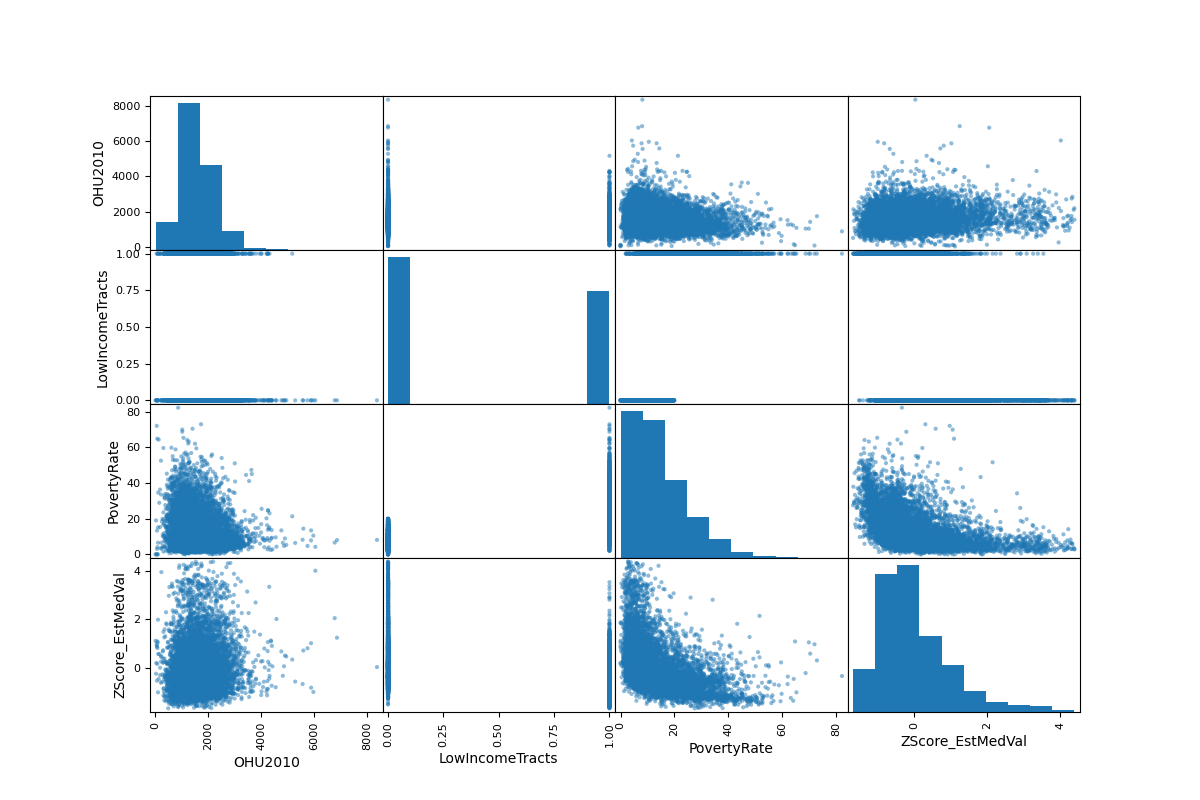

array([[<AxesSubplot:xlabel='OHU2010', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='OHU2010'>],
       [<AxesSubplot:xlabel='OHU2010', ylabel='LowIncomeTracts'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='LowIncomeTracts'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='LowIncomeTracts'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='LowIncomeTracts'>],
       [<AxesSubplot:xlabel='OHU2010', ylabel='PovertyRate'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='PovertyRate'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='PovertyRate'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='PovertyRate'>],
       [<AxesSubplot:xlabel='OHU2010', ylabel='ZScore_EstMedVal'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='ZScore_EstMedVal'>,
        <AxesSubplot:xlabel='PovertyRate', ylabe

In [44]:
from pandas.plotting import scatter_matrix
colist=clean_foodAccess_df.filter(['POP2010', 'OHU2010','LowIncomeTracts',
       'PovertyRate','ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


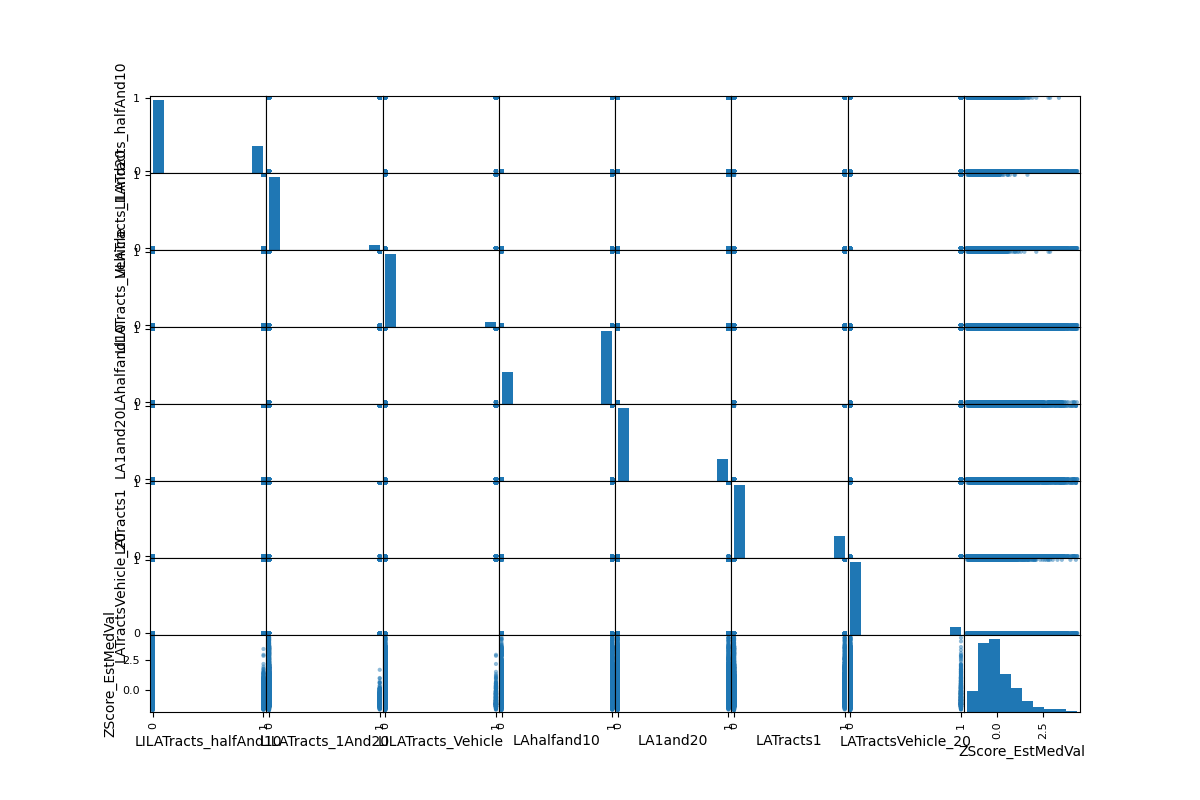

array([[<AxesSubplot:xlabel='LILATracts_halfAnd10', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LILATracts_1And20', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LILATracts_Vehicle', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LAhalfand10', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LA1and20', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LATracts1', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LATractsVehicle_20', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='LILATracts_halfAnd10'>],
       [<AxesSubplot:xlabel='LILATracts_halfAnd10', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LILATracts_1And20', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LILATracts_Vehicle', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LAhalfand10', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LA1and20', ylabel='LILATracts_1

In [45]:
colist=clean_foodAccess_df.filter(['LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle','LAhalfand10', 'LA1and20', 'LATracts1',
       'LATractsVehicle_20',  'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


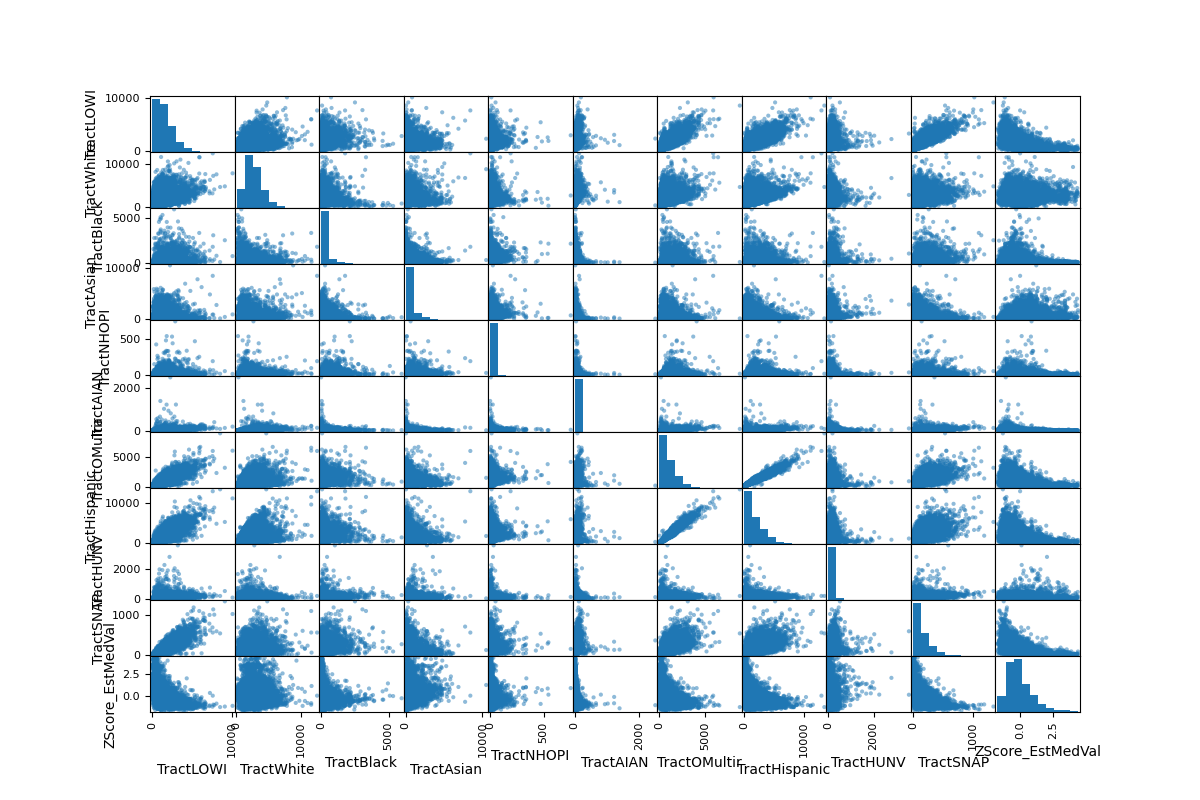

array([[<AxesSubplot:xlabel='TractLOWI', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractWhite', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractBlack', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractAsian', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractNHOPI', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractAIAN', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractOMultir', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractHispanic', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractHUNV', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractSNAP', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='TractLOWI'>],
       [<AxesSubplot:xlabel='TractLOWI', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractWhite', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractBlack', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractAsian', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractNHOPI', yl

In [46]:
colist=clean_foodAccess_df.filter(['TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP',  'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))